# Lab 7
Done by: Lexie Peterson  
Lab Partner: Kun Lee

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import h5py

In [3]:
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile)

infile2 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile2)

## Problem 1

In this problem I am going to explore the variable 'mass' from the Higgs Boson data set. I will be calculating the significance of the signal higgs agaisnt the background qcd distribution usinging simple poisson statistics. First, to get an idea of the higgs mass and qcd mass distributions, I will plot stacked histograms of them, which can be seen below.

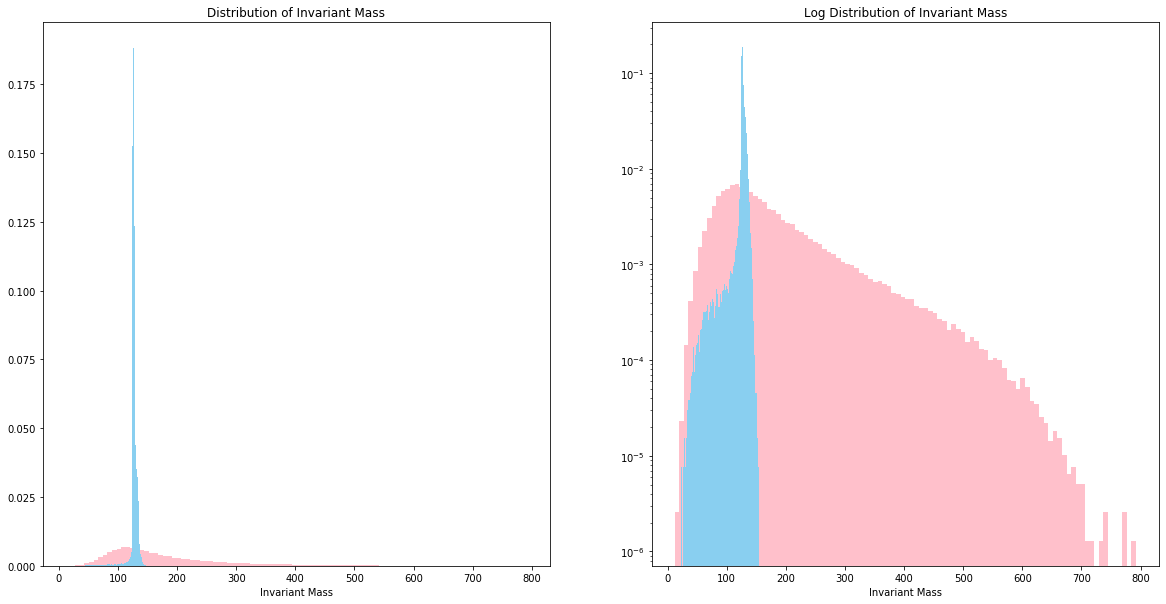

In [41]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")


ax[0].hist(higgs['mass'], bins=100, density=True, color='#89cff0')

ax[1].hist(higgs['mass'], bins=100, density=True, color='#89cff0')
ax[1].set_xlabel("Invariant Mass");

In the above histograms, the blue histogram is the higgs distribution while the pink is the qcd distribution. The higgs can be thought of as the signal while the qcd distribution thought of as the background. Now, with those histrograms out of the way, we can do the poisson statistics. I calculated the significance using two ways. The first way, I found the mean of the distributions using numpy's mean function. Due to the asymmetry of both distributions, the mean found this way isn't the same as the peak, thus in the second calculation I estimated the peak by eye using the histograms above to guess.

In [6]:
qcd_mean = np.mean(qcd['mass'])
qcd_std  = np.std(qcd['mass'])

five_sigma_prob = stats.norm.cdf(5)
five_sigma_significance = stats.poisson.ppf(five_sigma_prob, mu=qcd_mean)

print('QCD Mean:',qcd_mean)
print('QCD Standard Deviation:', qcd_std)
print('QCD 5-sigma Significance:', five_sigma_significance)

QCD Mean: 177.27313143544927
QCD Standard Deviation: 99.97182194341828
QCD 5-sigma Significance: 248.0


In [7]:
hig_mean = np.mean(higgs['mass'])
hig_std  = np.std(higgs['mass'])

print('Higgs Mean:',hig_mean)
print('Higgs Standard Deviation:', hig_std)

Higgs Mean: 126.663832224776
Higgs Standard Deviation: 8.407948104697619


In [42]:
prob = 1 - stats.poisson.cdf(hig_mean, mu=qcd_mean)
sigma = stats.norm.pdf(prob)
print('Sigma Significance of Higgs Peak:', sigma)

Sigma Significance of Higgs Peak: 0.24197812770011445


So using numpy, the sigma signifance of the Higgs peak is only 0.2419, which is quite low. Unfortunately, this is only marginally improved by using an estimated-by-eye mean. The calculation and result can be seen below. Overall, while the problem did call for using poisson ditribution to calculate significance, the poisson is not the best fit for this distribution and thus may contribute to such low sigmas. 

In [43]:
qcd_guess = 120
hig_guess = 150
prob = 1 - stats.poisson.cdf(hig_guess, mu=qcd_guess)
sigma = stats.norm.pdf(prob)
print('Sigma Significance of Higgs Peak:', sigma)

Sigma Significance of Higgs Peak: 0.39893976379048507


Now, I need to compare these sigma significance values to that of $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$. In the case of my data sample, $N_{Higgs}=50$ and $N_{QCD}=2000$, so $\frac{N_{Higgs}}{\sqrt{N_{QCD}}} = 1.11$. I believe through this problem that I was supposed to find that $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ is equal to that of the sigma significance, but 1.11 and 0.3989 are clearly not equal. I think this is due to the poor estimation the poisson is, and going forward I will assume that $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ is synonymous will the sigma significance.

## Problem 2

As we saw above, the significance of the higgs against the background qcd is quite low, and I wish to increase it. To do so, I will preform cuts to both qcd and higgs data sets to try and increase this significance. I used a sort of guess-and check method to my cuts. I looked at the histograms made in problem one and estimated a good upper and lower bound to my cuts so that the area of the higgs histogram would be more than that of the qcd histogram. The reason this is important is that the normalized area is what gives us $N_{Higgs}$ and $N_{QCD}$, which can then be used to calculate a sigma. We want the area of $N_{Higgs}$ to be greater than that of $N_{QCD}$ so that the sigma can be higher. Below are three example of the guess-and-check work I did with the last being the best sigma result I could get.

Area of cut higgs data: 0.1955716090060929
Area of cut qcd data: 0.10036086409991528
Nhiggs/sqrt(Nqcd), or significance: 0.6902058236472585


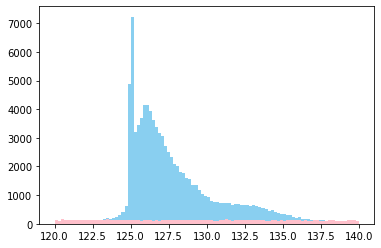

In [49]:
cut_qcd = []
for value in qcd['mass']:
    if value < 140:
        if value > 120:
            cut_qcd.append(value)
        
cut_hig = []
for value in higgs['mass']:
    if value < 140:
        if value > 120:
            cut_hig.append(value)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100)
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcd, bins=100)
area_qcd = sum(np.diff(bins)*values)

size_hig = len(cut_hig1)
size_qcd = len(cut_qcd1)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100, color='#89cff0')
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcd, bins=100, color='pink')
area_qcd1 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig/size_hig)
print("Area of cut qcd data:",area_qcd/size_qcd)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig*50/size_hig)/(np.sqrt(area_qcd*2000/size_qcd)))

In [13]:
print(area_hig/95219)
print(area_qcd/12515)
print((area_hig*50/95219)/(np.sqrt(area_qcd*2000/12515)))

0.19997519998802996
0.1999518805806862
0.4999981526403396


Area of cut higgs data: 0.3968009263599678
Area of cut qcd data: 0.39994818871488347
Nhiggs/sqrt(Nqcd), or significance: 0.7014969978230671


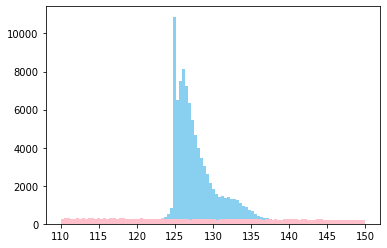

In [50]:
cut_qcd1 = []
for value in qcd['mass']:
    if value < 150:
        if value > 110:
            cut_qcd1.append(value)
        
cut_hig1 = []
for value in higgs['mass']:
    if value < 150:
        if value > 110:
            cut_hig1.append(value)

size_hig1 = len(cut_hig1)
size_qcd1 = len(cut_qcd1)
            
values1, bins1, _ = plt.hist(cut_hig1, bins=100, color='#89cff0')
area_hig1 = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcd1, bins=100, color = 'pink')
area_qcd1 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig1/size_hig1)
print("Area of cut qcd data:",area_qcd1/size_qcd1)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig1*50/size_hig1)/(np.sqrt(area_qcd1*2000/size_qcd1)))

Area of cut higgs data: 1.318387847207415
Area of cut qcd data: 1.3831302744007699
Nhiggs/sqrt(Nqcd), or significance: 1.2533335170905535


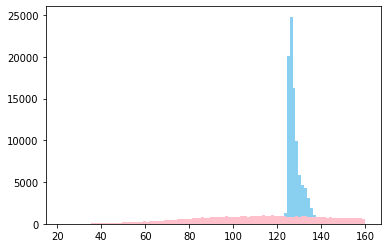

In [51]:
cut_qcd2 = []
for value in qcd['mass']:
    if value < 160:
        if value > 20:
            cut_qcd2.append(value)
        
cut_hig2 = []
for value in higgs['mass']:
    if value < 160:
        if value > 20:
            cut_hig2.append(value)

size_hig2 = len(cut_hig2)
size_qcd2 = len(cut_qcd2)
            
values1, bins1, _ = plt.hist(cut_hig2, bins=100, color='#89cff0')
area_hig2 = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcd2, bins=100, color='pink')
area_qcd2 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig2/size_hig2)
print("Area of cut qcd data:",area_qcd2/size_qcd2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig2*50/size_hig2)/(np.sqrt(area_qcd2*2000/size_qcd2)))

It would seem the best significance I could get was 1.25 sigma. This is still much better than the inital 0.39 sigma found by the poisson approximation and also marginally better than the inital $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ of 1.11. 

## Problem 3

In this problem, I am just going to show how the distribution has changed with the cuts I have made by plotting histograms.

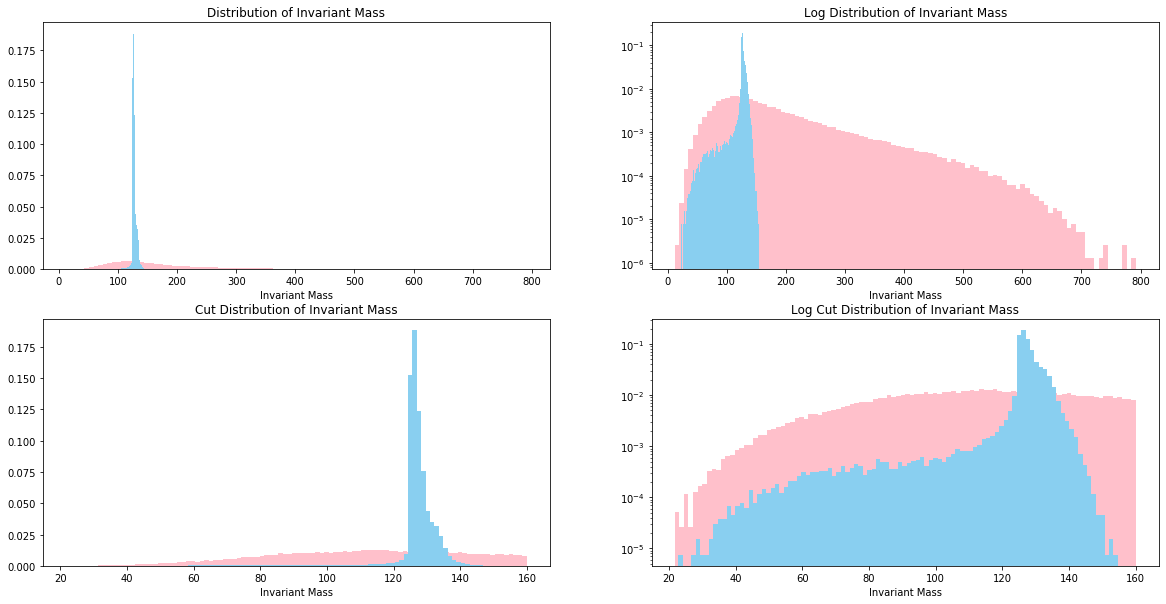

In [52]:
fig,ax = plt.subplots(2,2)                    
fig.set_size_inches(20,10)                   

ax[0,0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0,0].set_xlabel("Invariant Mass")
ax[0,0].set_title("Distribution of Invariant Mass")

ax[0,1].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0,1].set_xlabel("Invariant Mass")
ax[0,1].set_yscale('log')
ax[0,1].set_title("Log Distribution of Invariant Mass")


ax[0,0].hist(higgs['mass'], bins=100, density=True, color='#89cff0')

ax[0,1].hist(higgs['mass'], bins=100, density=True, color='#89cff0')
ax[0,1].set_xlabel("Invariant Mass");

ax[1,0].hist(cut_qcd2, bins=100, density=True, color='pink')
ax[1,0].set_xlabel("Invariant Mass")
ax[1,0].set_title("Cut Distribution of Invariant Mass")

ax[1,1].hist(cut_qcd2, bins=100, density=True, color='pink')
ax[1,1].set_xlabel("Invariant Mass")
ax[1,1].set_yscale('log')
ax[1,1].set_title("Log Cut Distribution of Invariant Mass")


ax[1,0].hist(cut_hig2, bins=100, density=True, color='#89cff0')

ax[1,1].hist(cut_hig2, bins=100, density=True, color='#89cff0')
ax[1,1].set_xlabel("Invariant Mass");

The top row of the plots above show the uncut distributions while the bottom row the cut higgs and qcd distributions. The left column show the distributions in linear form while the right logarithmically plots the distributions to better show how the tails were cut. Again, blue is the higgs distribution and pink is the qcd distribution. The left column shows us quite clearly how much of the qcd distribution has chopped of giving way to the area of it being smaller and allowing for a higher significance, which for convience is showed below.

In [53]:
print("Area of cut higgs data:",area_hig2/size_hig2)
print("Area of cut qcd data:",area_qcd2/size_qcd2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig2*50/size_hig2)/(np.sqrt(area_qcd2*2000/size_qcd2)))

Area of cut higgs data: 1.318387847207415
Area of cut qcd data: 1.3831302744007699
Nhiggs/sqrt(Nqcd), or significance: 1.2533335170905535


## Problem 4

For the final part of lab seven, I have looked into the other variables of the higgs and qcd data to see if any of the others may lead way an increase in the significance of a signal. The best variable I found for the job was t2 due to the higgs and qcd distributions looking differenct enough to allow for cuts that might increase its own significance. Other variables were looked at and considered, but they did not have as much promise as t2. 

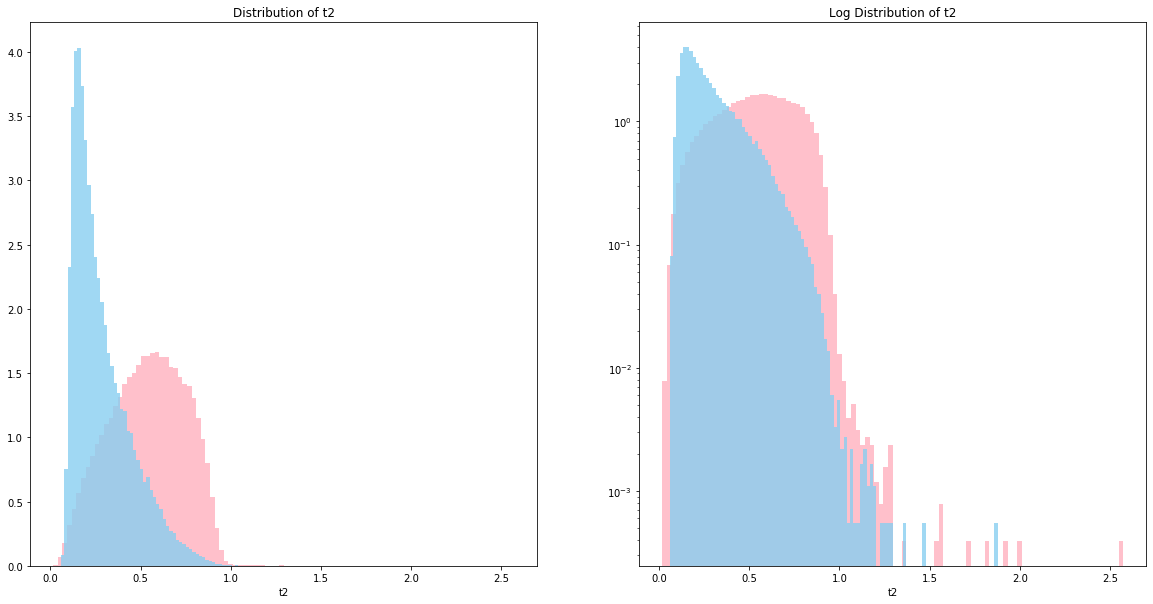

In [58]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[0].set_xlabel("t2")
ax[0].set_title("Distribution of t2")

ax[1].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[1].set_xlabel("t2")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of t2")


ax[0].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)

ax[1].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("t2");

Area of cut higgs data: 0.01818235639699808
Area of cut qcd data: 0.02557051351043427
Nhiggs/sqrt(Nqcd), or significance: 0.1271263119504207


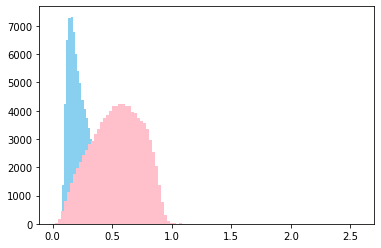

In [56]:
size_higt = len(higgs['t2'])
size_qcdt = len(qcd['t2'])
            
values1, bins1, _ = plt.hist(higgs['t2'], bins=100, color='#89cff0')
area_higt2 = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(qcd['t2'], bins=100, color='pink')
area_qcdt2 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_higt2/size_higt2)
print("Area of cut qcd data:",area_qcdt2/size_qcdt2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_higt2*50/size_higt2)/(np.sqrt(area_qcdt2*2000/size_qcdt2)))

The above calculations give us the significance of t2 before any cuts being made to be 0.12. This may seem quite low, and it is, but I went through similar processes with the other variables and this was the highest I got.

Area of cut higgs data: 0.01818235639699808
Area of cut qcd data: 0.01896100119197548
Nhiggs/sqrt(Nqcd), or significance: 0.14762997287893723


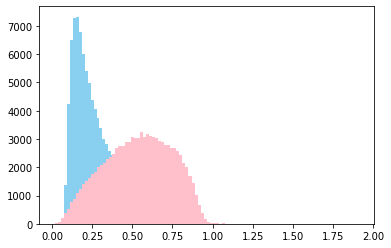

In [57]:
cut_qcdt2 = []
for value in qcd['t2']:
    if value < 2:
        if value > 0:
            cut_qcdt2.append(value)
        
cut_higt2 = []
for value in higgs['t2']:
    if value < 2:
        if value > 0:
            cut_higt2.append(value)

size_higt2 = len(cut_higt2)
size_qcdt2 = len(cut_qcdt2)
            
values1, bins1, _ = plt.hist(cut_higt2, bins=100, color='#89cff0')
area_higt2 = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcdt2, bins=100, color='pink')
area_qcdt2 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_higt2/size_higt2)
print("Area of cut qcd data:",area_qcdt2/size_qcdt2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_higt2*50/size_higt2)/(np.sqrt(area_qcdt2*2000/size_qcdt2)))

After making some cuts, I was able to increase the significance a little, from 0.12 to 0.14. It's not much, but it is something.

# Lab 8

In the previous sections I used data cuts on a simulation of the qcd data in order improve the significance without also bringing in my own biases causing my results to be wrong. Now, I am going to us the same cuts on actual qcd data to see how the significance turned out.

## Problem 1: High Luminosity Data  
First I will be exploring a high luminosity qcd data set. I will look into how my mass cuts impacted the significance of the observed data versus the results I found from the expected data above. I will start with the mass variable and then move onto t2.

### Mass

In [61]:
hf = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')
data = np.array(hf.get('data/block0_values'))
hf.close()
mass = data[:,3]
t2   = data[:,9]

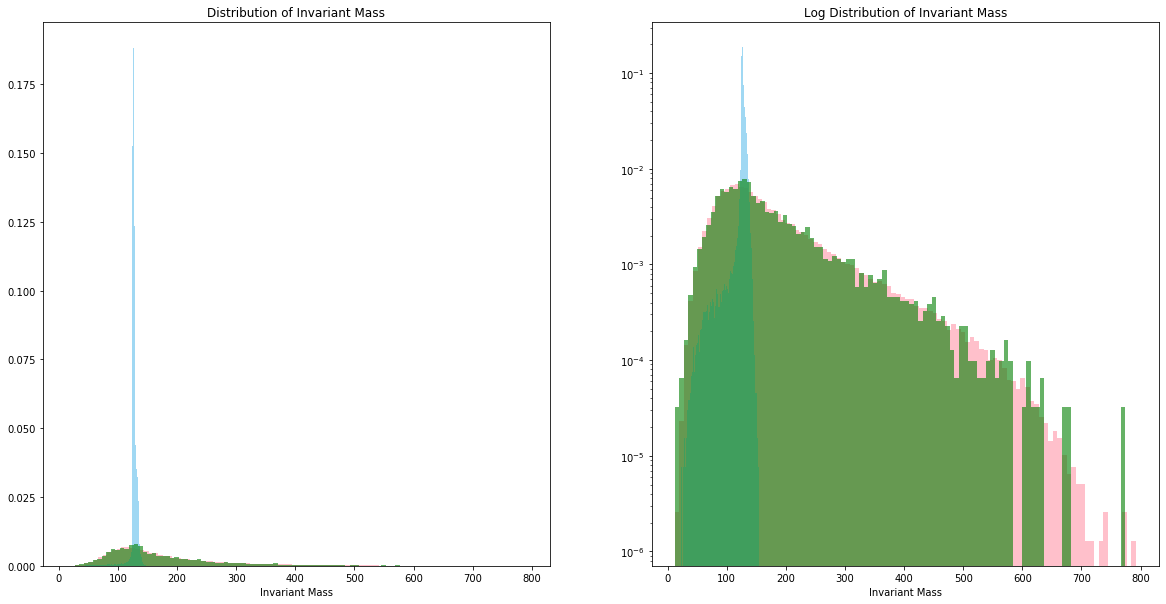

In [62]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")

ax[0].hist(higgs['mass'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(higgs['mass'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("Invariant Mass")


ax[0].hist(mass, bins=100, density=True, color='g', alpha=0.6)
ax[1].hist(mass, bins=100, density=True, color='g', alpha=0.6)
ax[1].set_xlabel("Invariant Mass");

In the above histograms I plotted the uncut datasets of observed qcd (green), expected qcd (pink), and expected higgs (blue). The left is plotted linearly while the right logarithmically. We can see from the right graph that the observed qcd fits the expected qcd pretty well until it gets to the right tail where the observed qcd becomes a bit more jagged.

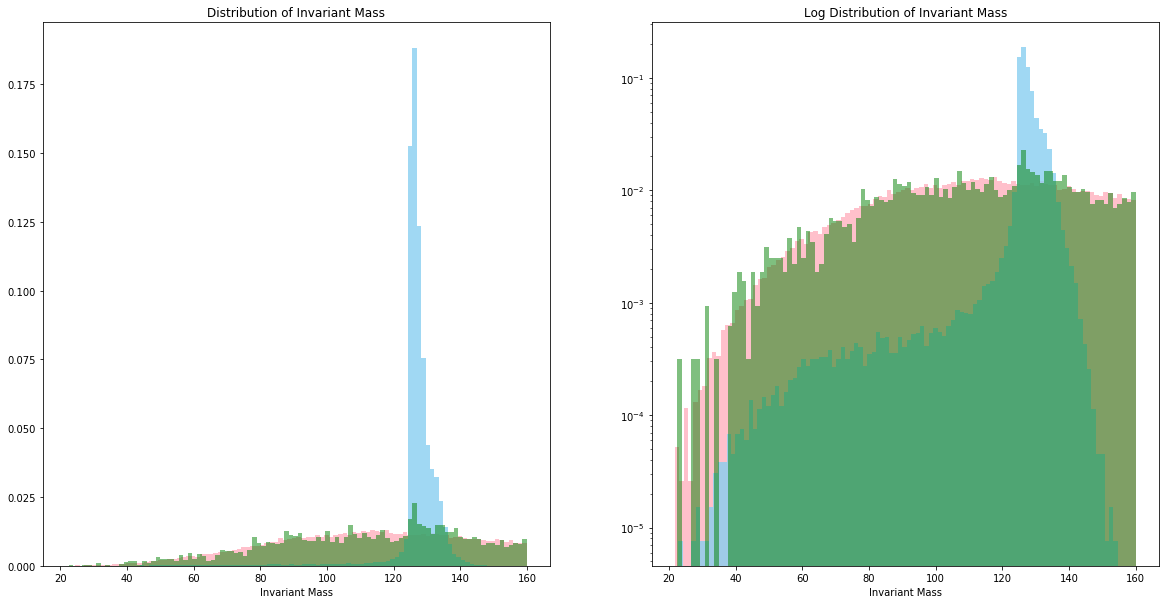

In [63]:
cut_mass = []
for value in mass:
    if value < 160:
        if value > 20:
            cut_mass.append(value)
        
cut_hig = []
for value in higgs['mass']:
    if value < 160:
        if value > 20:
            cut_hig.append(value)
cut_qcd = []
for value in qcd['mass']:
    if value < 160:
        if value > 20:
            cut_qcd.append(value)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(cut_qcd, bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(cut_qcd, bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")


ax[0].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("Invariant Mass")


ax[0].hist(cut_mass, bins=100, density=True, color='g', alpha=0.5)
ax[1].hist(cut_mass, bins=100, density=True, color='g', alpha=0.5)
ax[1].set_xlabel("Invariant Mass");

I have now applied my cuts to all three data sets (observed qcd, expected qcd, and expected higgs) and we can see how they call compare in the histrogram above. 

Area of cut higgs data: 1.318387847207415
Area of cut qcd data: 1.3747555129997948
Nhiggs/sqrt(Nqcd), or significance: 1.2571452610965053


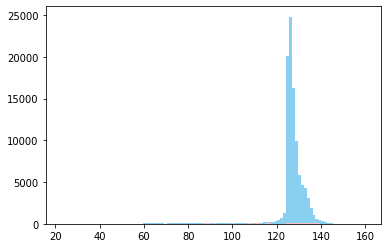

In [64]:
size_hig = len(cut_hig)
size_mass = len(cut_mass)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100, color='#89cff0')
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_mass, bins=100, color='pink')
area_mass = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig/size_hig)
print("Area of cut qcd data:",area_mass/size_mass)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig*50/size_hig)/(np.sqrt(area_mass*2000/size_mass)))

Finally, I have done the calculations for the observed significance and found it to be 1.257 which is a tiny bit higher than the observed significance of 1.253. So, the expected anf observed significance are well in line with each other.

### t2

Now I am going to repeat the same process I did above with mass but now with the variable t2.

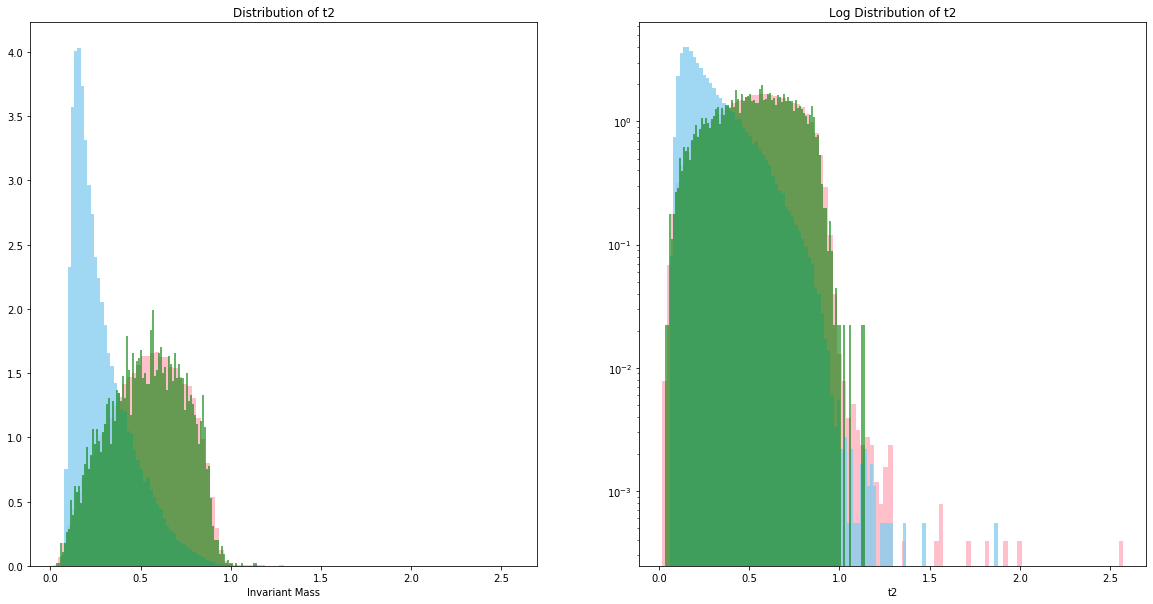

In [66]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of t2")

ax[1].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[1].set_xlabel("t2")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of t2")

ax[0].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("Invariant Mass")


ax[0].hist(t2, bins=100, density=True, color='g', alpha=0.6)
ax[1].hist(t2, bins=100, density=True, color='g', alpha=0.6)
ax[1].set_xlabel("t2");

In the above histograms I plotted the uncut datasets of observed qcd (green), expected qcd (pink), and expected higgs (blue). The left is plotted linearly while the right logarithmically. We can see from the right graph that the observed qcd fits the expected qcd pretty well until it gets to the right tail where the observed qcd drops off a little faster.

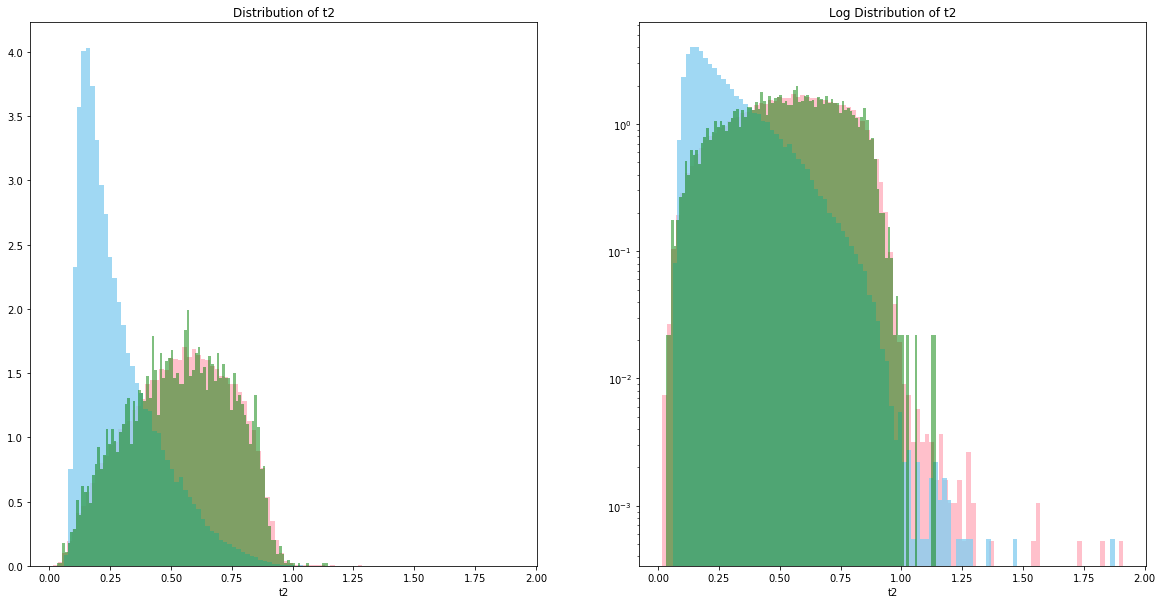

In [68]:
cut_t2 = []
for value in t2:
    if value < 2:
        if value > 0:
            cut_t2.append(value)
        
cut_hig = []
for value in higgs['t2']:
    if value < 2:
        if value > 0:
            cut_hig.append(value)
cut_qcd = []
for value in qcd['t2']:
    if value < 2:
        if value > 0:
            cut_qcd.append(value)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(cut_qcd, bins=100, density=True, color='pink')
ax[0].set_xlabel("t2")
ax[0].set_title("Distribution of t2")

ax[1].hist(cut_qcd, bins=100, density=True, color='pink')
ax[1].set_xlabel("t2")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of t2")


ax[0].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("t2")


ax[0].hist(cut_t2, bins=100, density=True, color='g', alpha=0.5)
ax[1].hist(cut_t2, bins=100, density=True, color='g', alpha=0.5)
ax[1].set_xlabel("t2");

The cuts made above do not appear to have made much of a difference, but as we showed in the lab seven portion, the cuts did in fact make a difference there despite not being able to visually see a difference in the distributions.

Area of cut higgs data: 0.01818235639699808
Area of cut qcd data: 0.011127876579814391
Nhiggs/sqrt(Nqcd), or significance: 0.1927076798403323


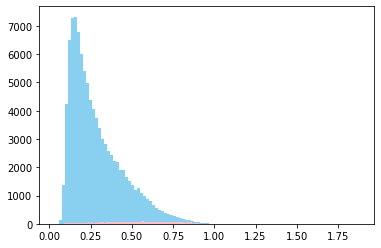

In [69]:
size_hig = len(cut_hig)
size_t2 = len(cut_t2)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100, color='#89cff0')
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_t2, bins=100, color='pink')
area_t2 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig/size_hig)
print("Area of cut qcd data:",area_t2/size_t2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig*50/size_hig)/(np.sqrt(area_t2*2000/size_t2)))

So the observed significance turned out to be 0.19, which is a little bigger than the expected significance of 0.17.

## Problem 2: Low Luminosity Data

For this problem, we are going to repeat the exact same steps as problem one but replace the high luminosity data with low luminosity data.

### Mass

In [70]:
hf = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')
data = np.array(hf.get('data/block0_values'))

In [71]:
hf.close()

In [72]:
mass = data[:,3]
t2   = data[:,9]

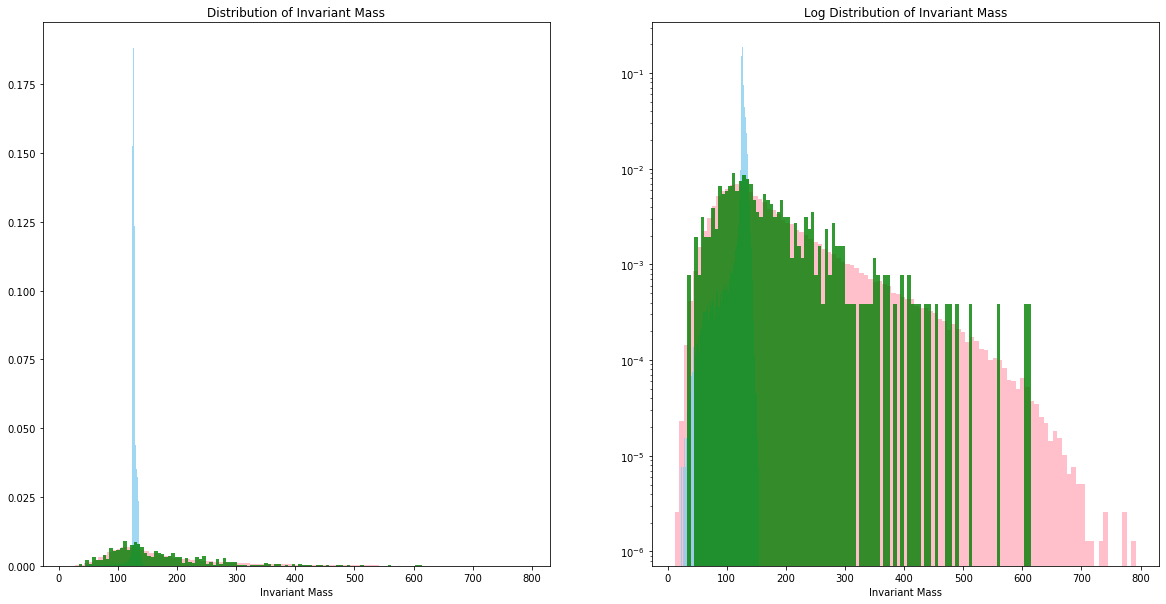

In [73]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")

ax[0].hist(higgs['mass'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(higgs['mass'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("Invariant Mass")


ax[0].hist(mass, bins=100, density=True, color='g', alpha=0.8)
ax[1].hist(mass, bins=100, density=True, color='g', alpha=0.8)
ax[1].set_xlabel("Invariant Mass");

In the above histograms I plotted the uncut datasets of observed qcd (green), expected qcd (pink), and expected higgs (blue). The left is plotted linearly while the right logarithmically. The right plot shows that the observed data doesn't fit quite as well as it did with the expected qcd data as the high luminosity data. This may lead to a bigger difference in the significance of the observed versus the expected.

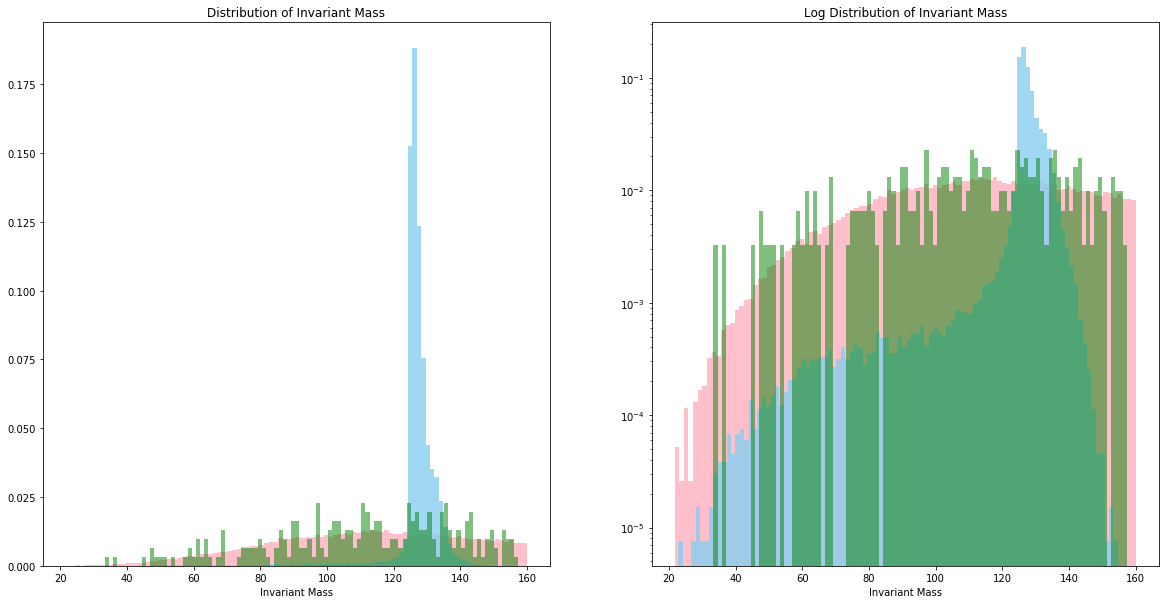

In [74]:
cut_mass = []
for value in mass:
    if value < 160:
        if value > 20:
            cut_mass.append(value)
        
cut_hig = []
for value in higgs['mass']:
    if value < 160:
        if value > 20:
            cut_hig.append(value)
cut_hig_mass = cut_hig
cut_qcd = []
for value in qcd['mass']:
    if value < 160:
        if value > 20:
            cut_qcd.append(value)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(cut_qcd, bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(cut_qcd, bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")


ax[0].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("Invariant Mass")


ax[0].hist(cut_mass, bins=100, density=True, color='g', alpha=0.5)
ax[1].hist(cut_mass, bins=100, density=True, color='g', alpha=0.5)
ax[1].set_xlabel("Invariant Mass");

The above plots show cuts done to all three data sets for the variable mass.

Area of cut higgs data: 1.318387847207415
Area of cut qcd data: 1.2407941894847725
Nhiggs/sqrt(Nqcd), or significance: 1.3232695593701256


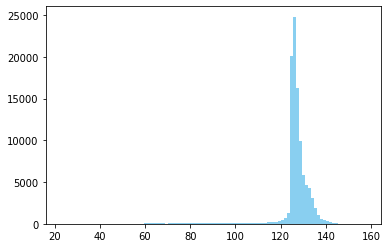

In [75]:
size_hig = len(cut_hig)
size_mass = len(cut_mass)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100, color='#89cff0')
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_mass, bins=100, color='pink')
area_mass = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig/size_hig)
print("Area of cut qcd data:",area_mass/size_mass)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig*50/size_hig)/(np.sqrt(area_mass*2000/size_mass)))

The significance turned out to be 1.32, which is bigger than the expected significance and bigger than the high luminosity data as I predicted.

## t2

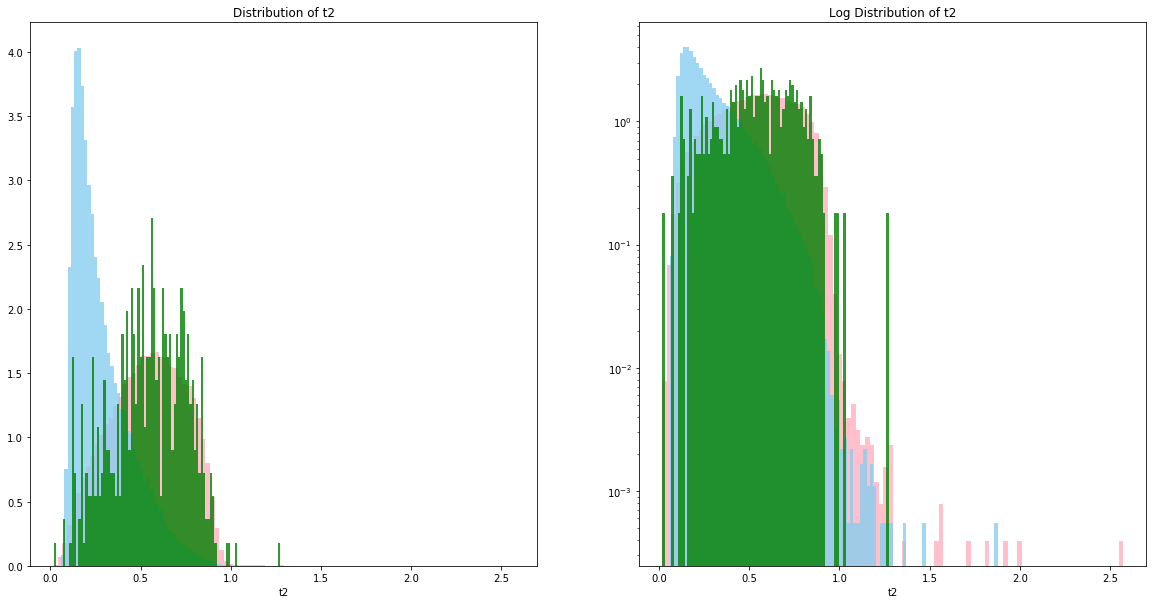

In [77]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[0].set_xlabel("t2")
ax[0].set_title("Distribution of t2")

ax[1].hist(qcd['t2'], bins=100, density=True, color='pink')
ax[1].set_xlabel("t2")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of t2")

ax[0].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(higgs['t2'], bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("t2")


ax[0].hist(t2, bins=100, density=True, color='g', alpha=0.8)
ax[1].hist(t2, bins=100, density=True, color='g', alpha=0.8)
ax[1].set_xlabel("t2");

In the above histograms I plotted the uncut datasets of observed qcd (green), expected qcd (pink), and expected higgs (blue). The left is plotted linearly while the right logarithmically. 

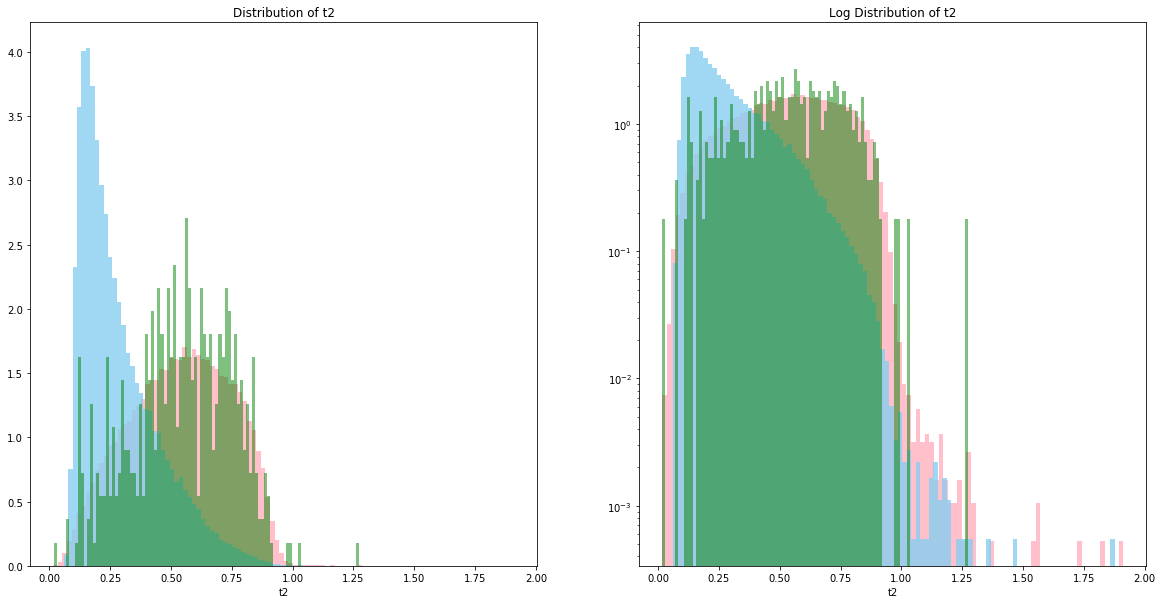

In [78]:
cut_t2 = []
for value in t2:
    if value < 2:
        if value > 0:
            cut_t2.append(value)
        
cut_hig = []
for value in higgs['t2']:
    if value < 2:
        if value > 0:
            cut_hig.append(value)
cut_qcd = []
for value in qcd['t2']:
    if value < 2:
        if value > 0:
            cut_qcd.append(value)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(cut_qcd, bins=100, density=True, color='pink')
ax[0].set_xlabel("t2")
ax[0].set_title("Distribution of t2")

ax[1].hist(cut_qcd, bins=100, density=True, color='pink')
ax[1].set_xlabel("t2")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of t2")


ax[0].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].hist(cut_hig, bins=100, density=True, color='#89cff0', alpha=0.8)
ax[1].set_xlabel("t2")


ax[0].hist(cut_t2, bins=100, density=True, color='g', alpha=0.5)
ax[1].hist(cut_t2, bins=100, density=True, color='g', alpha=0.5)
ax[1].set_xlabel("t2");

The plots above show the the data sets for t2 after the cuts have been made.

Area of cut higgs data: 0.01818235639699808
Area of cut qcd data: 0.012549300497404102
Nhiggs/sqrt(Nqcd), or significance: 0.1814660614405063


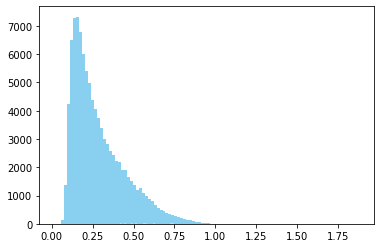

In [79]:
size_hig = len(cut_hig)
size_t2 = len(cut_t2)
            
values1, bins1, _ = plt.hist(cut_hig, bins=100, color='#89cff0')
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_t2, bins=100, color='pink')
area_t2 = sum(np.diff(bins)*values)

print("Area of cut higgs data:",area_hig/size_hig)
print("Area of cut qcd data:",area_t2/size_t2)
print("Nhiggs/sqrt(Nqcd), or significance:",(area_hig*50/size_hig)/(np.sqrt(area_t2*2000/size_t2)))

The significance of the low luminosity data for t2 was 0.18, which is greater than what was expected and lower than the significance of the high luminosity data.

## Problem 3

In this very last problem, I am just going to be calculating the 95% confidence bounds for the low luminosity data, specifically for the mass variable since the t2 variable's significance really wasn't all that great (neither was mass but it is the best out of all the variables).

In [81]:
conf = 0.95
bound = 1
area = 0

while area < conf:
    bound += 0.01
    count = 0
    for value in cut_hig_mass:
        if value < bound:
            count += 1
            
    area = count / len(cut_hig_mass)

In [82]:
print("95% confidence upper-bound expected: ",bound)

95% confidence upper-bound expected:  134.62000000002254


In [83]:
conf = 0.95
bound = 1
area = 0

while area < conf:
    bound += 0.01
    count = 0
    for value in cut_mass:
        if value < bound:
            count += 1
            
    area = count / len(cut_mass)

In [84]:
print("95% confidence upper-bound observed: ",bound)

95% confidence upper-bound observed:  150.4000000000082


So, the 95% confidence upper bound was greater for the observed data versus the expected data. This could be due to the expected significance being a little less than that of the observed.